This is a test notebook for the VQ-VAE model. 

# Test load data to be used for VQ-VAE using the old dataloader

In [1]:
from evlicious import Events
from pathlib import Path
import torch
import numpy as np
from matplotlib import pyplot as plt
from suppressor.DSEC_dataloader.SemanticSequence import SemanticSequence

Cannot use ros api
Cannot use ros api
Cannot import Open3d
Cannot import Open3d


/home/pellerito/anaconda3/envs/hmnetmod/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


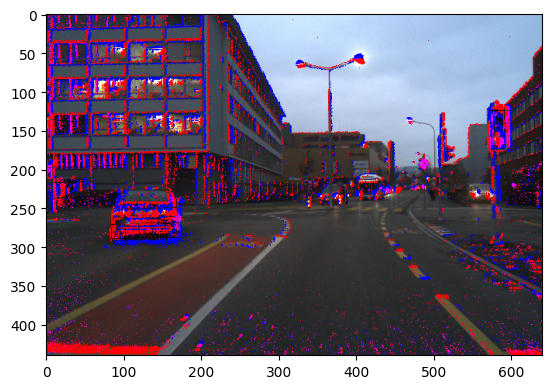

In [2]:
# Use the specific sequence path provided by the user
sequence_path = Path("/data/scratch/pellerito/datasets/DSEC/test/zurich_city_14_c")

seq = SemanticSequence(sequence_path, class_format='19')
# data = seq[0]
for data in seq:
    # print(f"Data: {data}")

    raw_events = data['events']
    mask_for_out_events = (raw_events['x'] >= 0) & (raw_events['x'] < 640) & (raw_events['y'] >= 0) & (raw_events['y'] < 440)
    events = Events(x=raw_events['x'][mask_for_out_events].astype(np.int16).astype(np.uint16), 
                    y=raw_events['y'][mask_for_out_events].astype(np.int16).astype(np.uint16), 
                    t=raw_events['t'][mask_for_out_events].astype(np.int64), 
                    p=raw_events['p'][mask_for_out_events].astype(np.int8), 
                    width=640, height=440
                    )
    frame = np.array(data['frame'])
    rendered_events = events.render(frame)
    plt.imshow(rendered_events)
    break
    # plt.savefig('rendered_events.png')

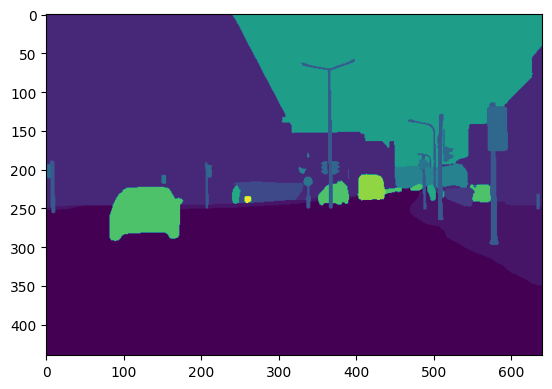

In [3]:
plt.imshow(seq[0]['semantic_gt'])

In [4]:
raw_events

{'x': array([191.16745,  85.50619, 483.25302, ..., 203.49951, 326.40036,
        302.09378], dtype=float32),
 'y': array([ 32.475647,  97.81227 , 194.05855 , ..., 462.89267 ,  60.739544,
        136.94331 ], dtype=float32),
 'p': array([0, 1, 1, ..., 1, 1, 1], dtype=uint8),
 't': array([55343557557, 55343557557, 55343557557, ..., 55343607554,
        55343607555, 55343607555], dtype=uint64)}

In [5]:
from hmnet.models.base.backbone.latent_VQ_VAE import Quantizer2D, Quantizer1D

In [6]:
# Example usage
xyq = Quantizer2D(num_embeddings=256, embedding_dim=32, img_size=(240, 180))
tq = Quantizer1D(num_embeddings=100, embedding_dim=16, hidden_dim=128)
pq = Quantizer1D(num_embeddings=2, embedding_dim=16, hidden_dim=128)

xy = torch.randint(0, 240, (10, 2))  # fake coords
t = torch.randint(0, int(1e6), (10, 1))  # fake timestamps
p = torch.randint(0, 180, (10, 1))  # fake polarity values

q_xy, idx_xy, loss_xy = xyq(xy)
q_t, idx_t, loss_t = tq(t)
q_p, idx_p, loss_p = pq(p)

print("XY quantized:", q_xy.shape, "idx:", idx_xy.shape, "loss:", loss_xy.item())
print("T quantized:", q_t.shape, "idx:", idx_t.shape, "loss:", loss_t.item())
print("P quantized:", q_p.shape, "idx:", idx_p.shape, "loss:", loss_p.item())

XY quantized: torch.Size([10, 32]) idx: torch.Size([10, 1]) loss: 0.25240078568458557
T quantized: torch.Size([10, 16]) idx: torch.Size([10, 1]) loss: 0.12604168057441711
P quantized: torch.Size([10, 16]) idx: torch.Size([10, 1]) loss: 0.13839174807071686


In [7]:
from hmnet.models.base.backbone.vit import VQPositionEmbedding1D, VQPositionEmbedding2D

/home/pellerito/anaconda3/envs/hmnetmod/lib/python3.9/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [11]:
time_bins = 100 # number of bins in which the time is discretized

time = torch.randint(0, int(time_bins), (50, 1))  # fake timestamps

out_dim = [32, 32, 32]
dynamic = [True, True, True]
dynamic_dim = [32, 32, 32]

time_embedder = VQPositionEmbedding1D(x_size=time_bins, embed_dim=out_dim[1], dynamic=dynamic[1], hidden_dim=dynamic_dim[1], shift_normalize=True, scale_normalize=True)
time_embedder.generate_quantizer_from_table(time)
time_embedder.position_embedding_table.shape

torch.Size([50, 32])

In [12]:

time_embedding = time_embedder(time)

IndexError: index 76 is out of bounds for dimension 0 with size 50